<a href="https://colab.research.google.com/github/Eylz-Liu/Mod-le-vol-locale/blob/main/Etude_GSE_Output_v1811.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 - Tirage Taux court


In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

1.1 Extraction de GSE Taux *court* Yearly


In [6]:
# Étape 1 : Uploader le fichier Excel depuis ton ordinateur
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_TXCOURT_Y.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name=0, header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
TL_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years):", maturities)
print("TL Matrix shape:", TL_matrix.shape)
print("TL Matrix (extrait):\n", TL_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_TXCOURT_Y.xlsx to TIRAGES_TXCOURT_Y (2).xlsx
T_array (maturities): (42,)
Maturities (years): [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TL Matrix shape: (1000, 42)
TL Matrix (extrait):
 [[0.02545417 0.04132304 0.04553993 0.02755292 0.01473777 0.01002518
  0.01163666]
 [0.02545417 0.00696715 0.00398873 0.01888655 0.03269351 0.04046442
  0.03983933]
 [0.02545417 0.0192707  0.01167816 0.00756667 0.00883847 0.01948922
  0.01400606]
 [0.02545417 0.02490723 0.03338901 0.04304006 0.04112793 0.02799685
  0.03645493]
 [0.02545417 0.01238482 0.00752674 0.01123586 0.0152697  0.0229885
  0.02645372]]


 extraction Taux long Tirage

In [7]:
# Étape 1 : ********* Taux Long Yearly **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_TXLONG_Y.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name=0, header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
TLT_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years):", maturities)
print("TLT Matrix shape:", TLT_matrix.shape)
print("TLT Matrix (extrait):\n", TLT_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_TXLONG_Y.xlsx to TIRAGES_TXLONG_Y (1).xlsx
T_array (maturities): (42,)
Maturities (years): [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TLT Matrix shape: (1000, 42)
TLT Matrix (extrait):
 [[0.02487799 0.03097075 0.03394734 0.03146827 0.0278616  0.02064993
  0.02682506]
 [0.02487799 0.01986689 0.018398   0.02064449 0.0248214  0.03306923
  0.02625613]
 [0.02487799 0.01993678 0.02234273 0.02331865 0.01983167 0.01821649
  0.02104267]
 [0.02487799 0.03029036 0.02885652 0.02903714 0.03340042 0.03545674
  0.03227611]
 [0.02487799 0.01386565 0.01844111 0.02399018 0.02519239 0.01959118
  0.01083871]]


Extraction Tirage Action transformé en %

In [13]:
# Étape 1 : ********* ACTION Yearly **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_INDACT_Y5.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name="V2", header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities - indice action):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
ACT_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years) - indice action:", maturities)
print("TL Matrix shape - indice action:", TL_matrix.shape)
print("TL Matrix (extrait) - indice action:\n", TL_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_INDACT_Y5.xlsx to TIRAGES_INDACT_Y5 (1).xlsx
T_array (maturities - indice action): (42,)
Maturities (years) - indice action: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TL Matrix shape - indice action: (1000, 42)
TL Matrix (extrait) - indice action:
 [[0.02545417 0.04132304 0.04553993 0.02755292 0.01473777 0.01002518
  0.01163666]
 [0.02545417 0.00696715 0.00398873 0.01888655 0.03269351 0.04046442
  0.03983933]
 [0.02545417 0.0192707  0.01167816 0.00756667 0.00883847 0.01948922
  0.01400606]
 [0.02545417 0.02490723 0.03338901 0.04304006 0.04112793 0.02799685
  0.03645493]
 [0.02545417 0.01238482 0.00752674 0.01123586 0.0152697  0.0229885
  0.02645372]]


Extraction IMMO transformé en %

In [14]:
# Étape 1 : ********* Indice IMMO Yearly **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_INDIMMO_Y2.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name="V2", header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities) - indice immo:", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
IMMO_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years) - indice immo:", maturities)
print("TLT Matrix shape - indice immo:", TLT_matrix.shape)
print("TLT Matrix (extrait) - indice immo:\n", TLT_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_INDIMMO_Y2.xlsx to TIRAGES_INDIMMO_Y2.xlsx
T_array (maturities) - indice immo: (42,)
Maturities (years) - indice immo: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TLT Matrix shape - indice immo: (1000, 42)
TLT Matrix (extrait) - indice immo:
 [[0.02487799 0.03097075 0.03394734 0.03146827 0.0278616  0.02064993
  0.02682506]
 [0.02487799 0.01986689 0.018398   0.02064449 0.0248214  0.03306923
  0.02625613]
 [0.02487799 0.01993678 0.02234273 0.02331865 0.01983167 0.01821649
  0.02104267]
 [0.02487799 0.03029036 0.02885652 0.02903714 0.03340042 0.03545674
  0.03227611]
 [0.02487799 0.01386565 0.01844111 0.02399018 0.02519239 0.01959118
  0.01083871]]


Extraction des output BE&PVFFP des 1000 scénarios

In [20]:
# Étape 1 : ********* Output BE PVFP **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "BE_PVFP.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name=0, header=None)

# Vérifier la structure
print("Shape du fichier :", df.shape)
print("Aperçu des premières lignes :\n", df.head())


# Extraire les colonnes BE et PVFP
be_array = df.iloc[:, 1].values       # 2e colonne → BE
pvfp_array = df.iloc[:, 2].values     # 3e colonne → PVFP

# Optionnel : convertir en DataFrames séparés
be_df = pd.DataFrame(be_array, columns=["BE"])
pvfp_df = pd.DataFrame(pvfp_array, columns=["PVFP"])

# Affichage
print("BE (array):", be_array[:5])
print("PVFP (array):", pvfp_array[:5])

Saving BE_PVFP.xlsx to BE_PVFP (5).xlsx
Shape du fichier : (1001, 3)
Aperçu des premières lignes :
              0             1            2
0  N° scénario            BE         PVFP
1            1  10587927.552    414908.64
2            2  14084962.304      1583008
3            3  11801696.256   513327.008
4            4  12646100.992  1386158.336
BE (array): ['BE' 10587927.552 14084962.304 11801696.256 12646100.992]
PVFP (array): ['PVFP' 414908.64 1583008 513327.008 1386158.336]


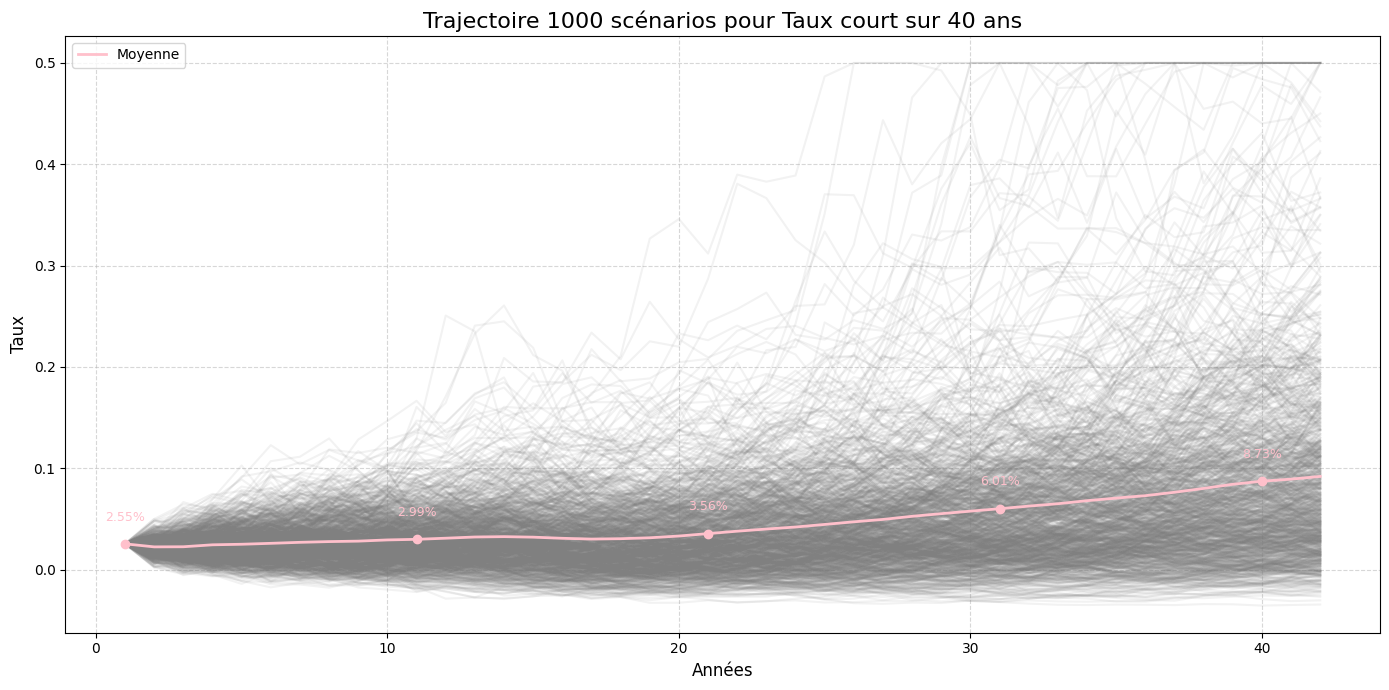

In [8]:

plt.figure(figsize=(14, 7))
for i in range(TL_matrix.shape[0]):
    plt.plot(maturities, TL_matrix[i, :], color='gray', alpha=0.1)

# Ajouter la moyenne en surbrillance
mean_by_year = TL_matrix.mean(axis=0)
plt.plot(maturities, mean_by_year, color='pink', linewidth=2, label='Moyenne')
std_by_year = TL_matrix.std(axis=0)

# Choisir les indices d'années à annoter
indices_to_annotate = [0, 10, 20, 30, 39]  # ajustable selon ton besoin

# Ajouter les points annotés
for idx in indices_to_annotate:
    x = maturities[idx]
    y = mean_by_year[idx]
    plt.scatter(x, y, color='pink', zorder=5)
    plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='pink')

# Personnalisation
plt.title("Trajectoire 1000 scénarios pour Taux court sur 40 ans", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()





In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scenario_trajectories(TL_matrix, maturities, plot_title):
    """
    Affiche les trajectoires de taux simulés avec la moyenne en surbrillance et annotations.

    Parameters:
    - TL_matrix : np.ndarray, shape (n_scenarios, n_years)
    - maturities : array-like, les années correspondantes
    - plot_title : str, titre du graphique
    """
    plt.figure(figsize=(14, 7))

    # Tracer tous les scénarios
    for i in range(TL_matrix.shape[0]):
        plt.plot(maturities, TL_matrix[i, :], color='gray', alpha=0.1)

    # Moyenne par année
    mean_by_year = TL_matrix.mean(axis=0)
    plt.plot(maturities, mean_by_year, color='pink', linewidth=2, label='Moyenne')

    # Points annotés
    indices_to_annotate = [0, 10, 20, 30, 39]
    for idx in indices_to_annotate:
        if idx < len(maturities):
            x = maturities[idx]
            y = mean_by_year[idx]
            plt.scatter(x, y, color='pink', zorder=5)
            plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='pink')

    # Personnalisation
    plt.title(plot_title, fontsize=16)
    plt.xlabel("Années", fontsize=12)
    plt.ylabel("Taux", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


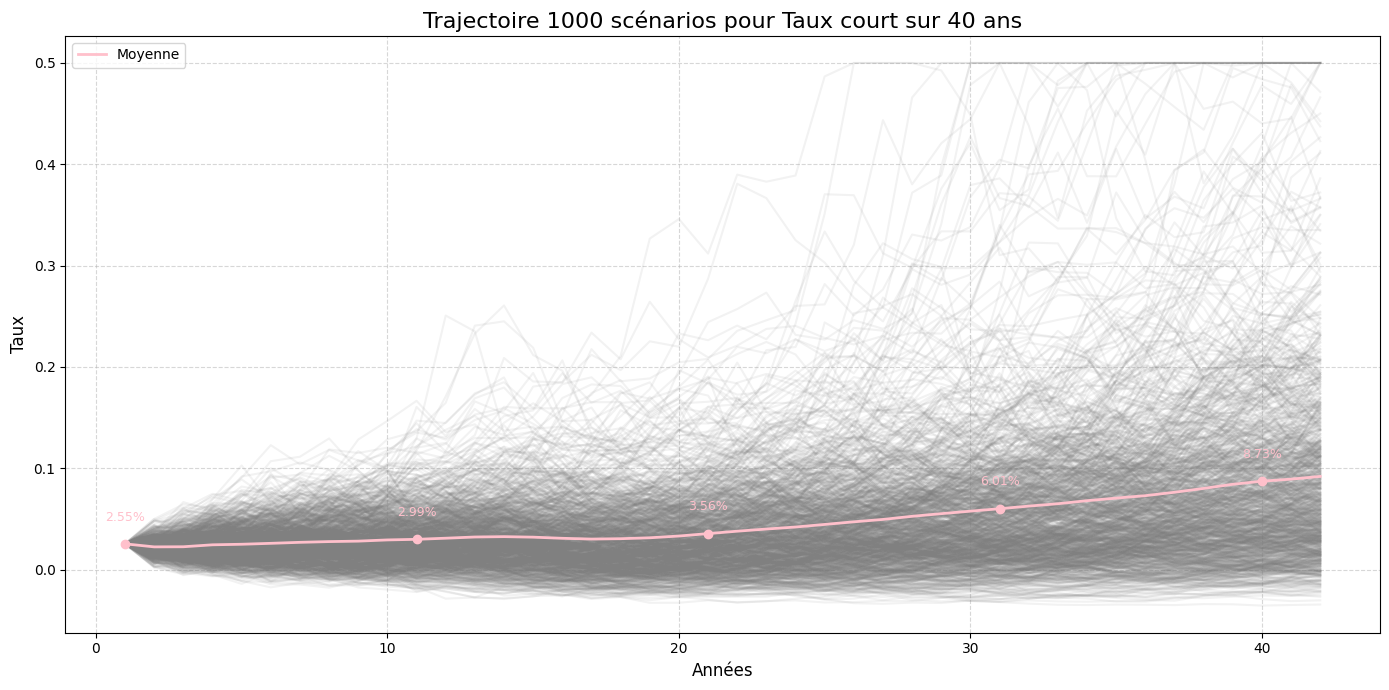

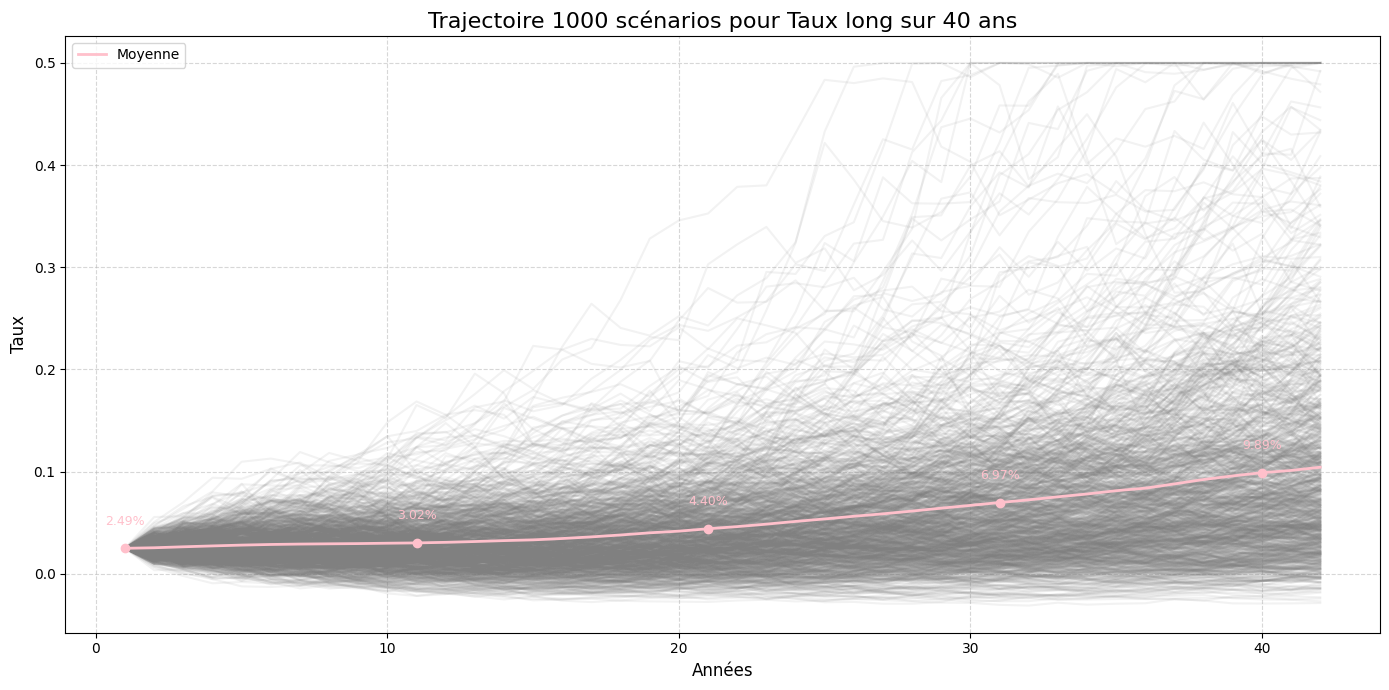

In [12]:
plot_scenario_trajectories(TL_matrix, maturities, "Trajectoire 1000 scénarios pour Taux court sur 40 ans")
plot_scenario_trajectories(TLT_matrix, maturities, "Trajectoire 1000 scénarios pour Taux long sur 40 ans")

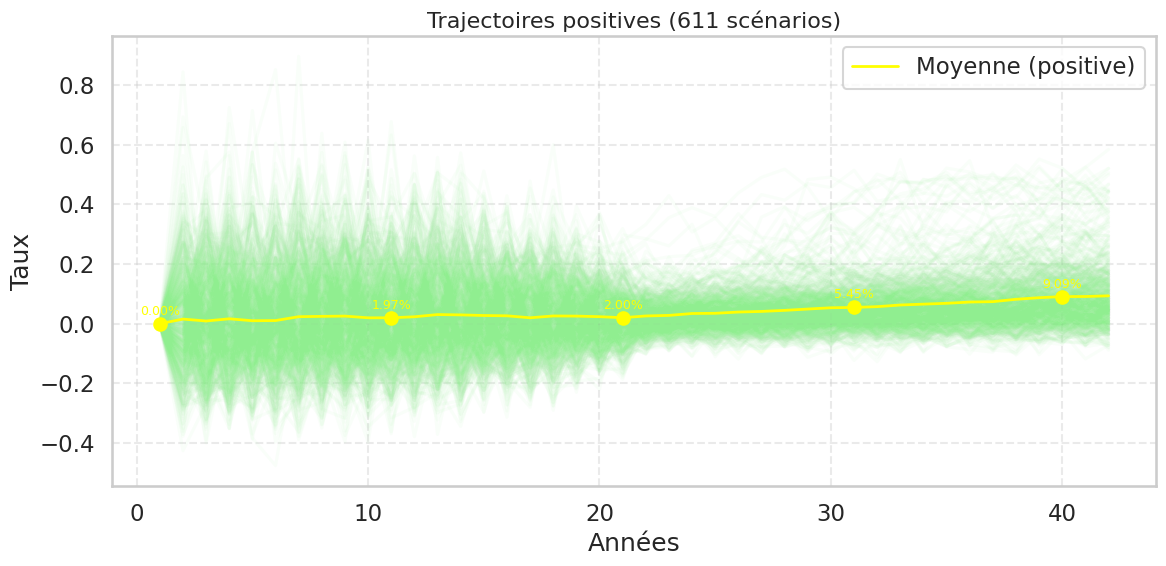

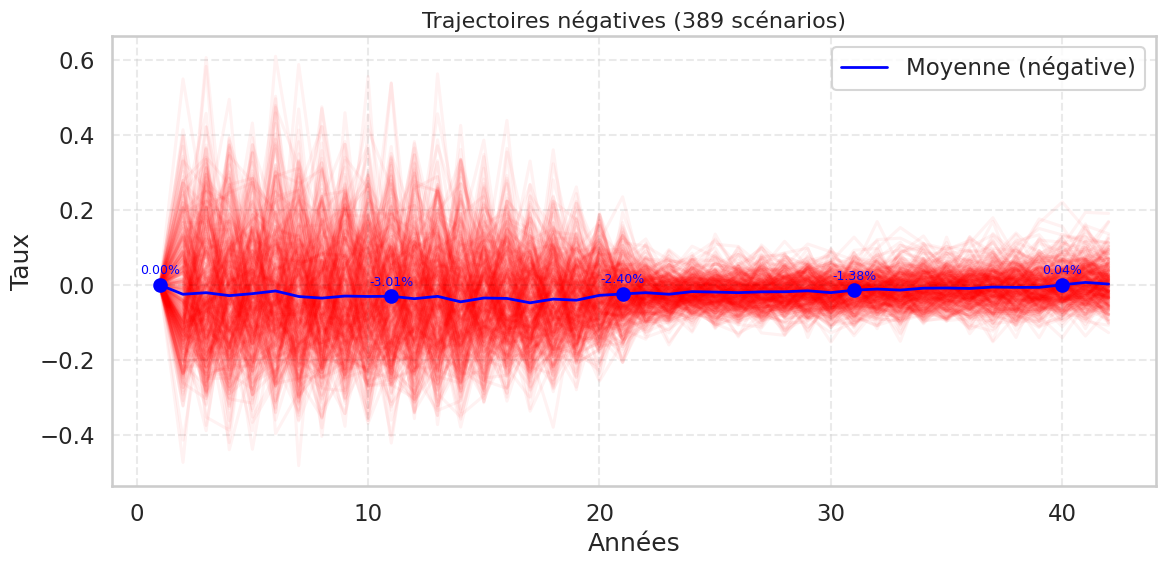

Nombre de scénarios avec quantile 95% positif : 945
Nombre de scénarios avec quantile 95% négatif : 55


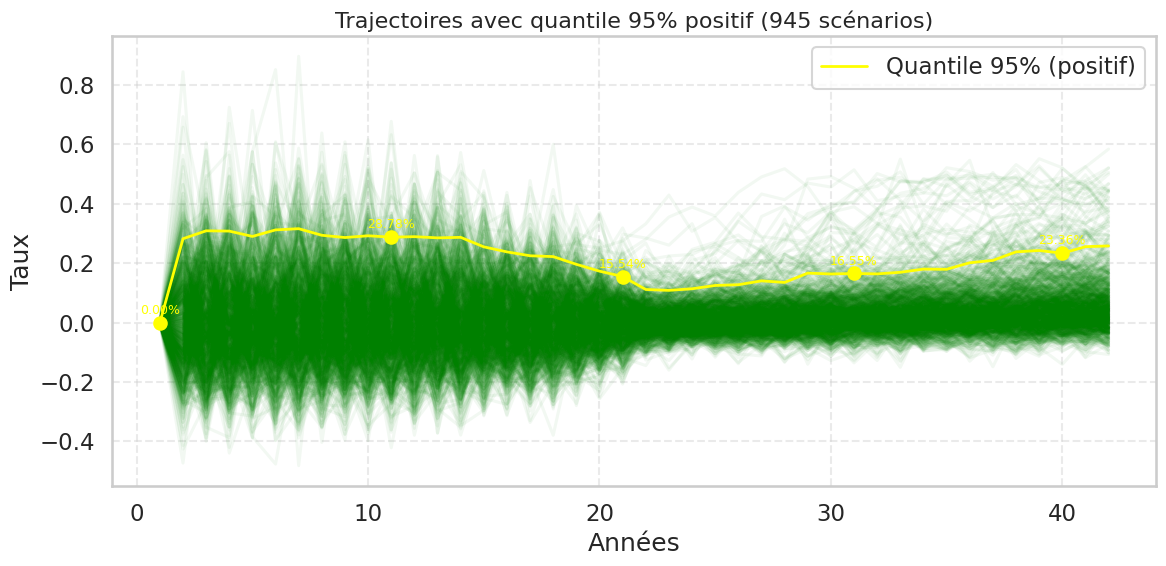

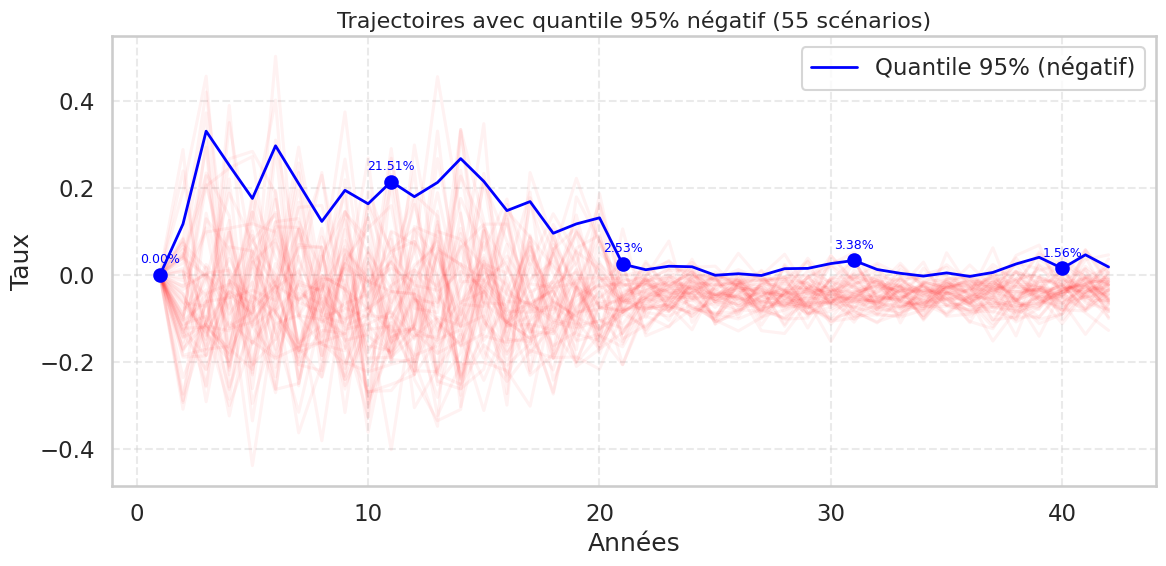

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Séparation des scénarios    ********** taux court **************
mean_by_scenario = TL_matrix.mean(axis=1)
positive_indices = np.where(mean_by_scenario > 0)[0]
negative_indices = np.where(mean_by_scenario < 0)[0]

TL_positive = TL_matrix[positive_indices, :]
TL_negative = TL_matrix[negative_indices, :]

# Choix des années à annoter
indices_to_annotate = [0, 10, 20, 30, 39]

# 📈 Groupe 1 : Trajectoires positives
plt.figure(figsize=(12, 6))
for i in range(TL_positive.shape[0]):
    plt.plot(maturities, TL_positive[i, :], color='lightgreen', alpha=0.05)

mean_pos = TL_positive.mean(axis=0)
plt.plot(maturities, mean_pos, color='yellow', linewidth=2, label='Moyenne (positive)')

# Points annotés
for idx in indices_to_annotate:
    x = maturities[idx]
    y = mean_pos[idx]
    plt.scatter(x, y, color='yellow', zorder=5)
    plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='yellow')

plt.title(f"Trajectoires positives ({len(positive_indices)} scénarios)", fontsize=16)
plt.xlabel("Années")
plt.ylabel("Taux")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# 📉 Groupe 2 : Trajectoires négatives
plt.figure(figsize=(12, 6))
for i in range(TL_negative.shape[0]):
    plt.plot(maturities, TL_negative[i, :], color='red', alpha=0.05)

mean_neg = TL_negative.mean(axis=0)
plt.plot(maturities, mean_neg, color='blue', linewidth=2, label='Moyenne (négative)')

# Points annotés
for idx in indices_to_annotate:
    x = maturities[idx]
    y = mean_neg[idx]
    plt.scatter(x, y, color='blue', zorder=5)
    plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='blue')

plt.title(f"Trajectoires négatives ({len(negative_indices)} scénarios)", fontsize=16)
plt.xlabel("Années")
plt.ylabel("Taux")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# *************************************** Calcul du quantile 95% pour chaque scénario *********************************************
quantile_95_by_scenario = np.quantile(TL_matrix, 0.75, axis=1)

# Séparer les scénarios selon le signe du quantile 95%
positive_indices = np.where(quantile_95_by_scenario > 0)[0]
negative_indices = np.where(quantile_95_by_scenario < 0)[0]

# Compter les scénarios
nb_positive = len(positive_indices)
nb_negative = len(negative_indices)

print(f"Nombre de scénarios avec quantile 95% positif : {nb_positive}")
print(f"Nombre de scénarios avec quantile 95% négatif : {nb_negative}")

# Extraire les matrices
TL_positive = TL_matrix[positive_indices, :]
TL_negative = TL_matrix[negative_indices, :]

# Choix des années à annoter
indices_to_annotate = [0, 10, 20, 30, 39]

# Groupe positif
plt.figure(figsize=(12, 6))
for i in range(TL_positive.shape[0]):
    plt.plot(maturities, TL_positive[i, :], color='green', alpha=0.05)

mean_pos = np.quantile(TL_positive, 0.95, axis=0)
plt.plot(maturities, mean_pos, color='yellow', linewidth=2, label='Quantile 95% (positif)')

for idx in indices_to_annotate:
    x = maturities[idx]
    y = mean_pos[idx]
    plt.scatter(x, y, color='yellow', zorder=5)
    plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='yellow')

plt.title(f"Trajectoires avec quantile 95% positif ({nb_positive} scénarios)", fontsize=16)
plt.xlabel("Années")
plt.ylabel("Taux")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# Groupe négatif
plt.figure(figsize=(12, 6))
for i in range(TL_negative.shape[0]):
    plt.plot(maturities, TL_negative[i, :], color='red', alpha=0.05)

mean_neg = np.quantile(TL_negative, 0.95, axis=0)
plt.plot(maturities, mean_neg, color='blue', linewidth=2, label='Quantile 95% (négatif)')

for idx in indices_to_annotate:
    x = maturities[idx]
    y = mean_neg[idx]
    plt.scatter(x, y, color='blue', zorder=5)
    plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='blue')

plt.title(f"Trajectoires avec quantile 95% négatif ({nb_negative} scénarios)", fontsize=16)
plt.xlabel("Années")
plt.ylabel("Taux")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


1.2 Statistiques descriptives par année ( par colonnes) sur les 1000 scnéarios

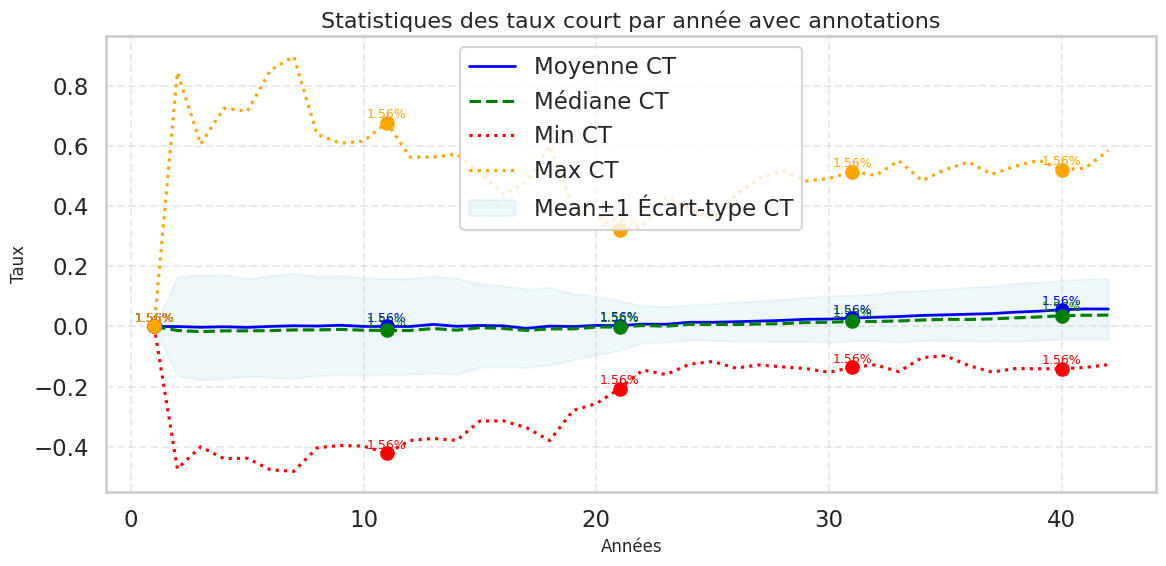

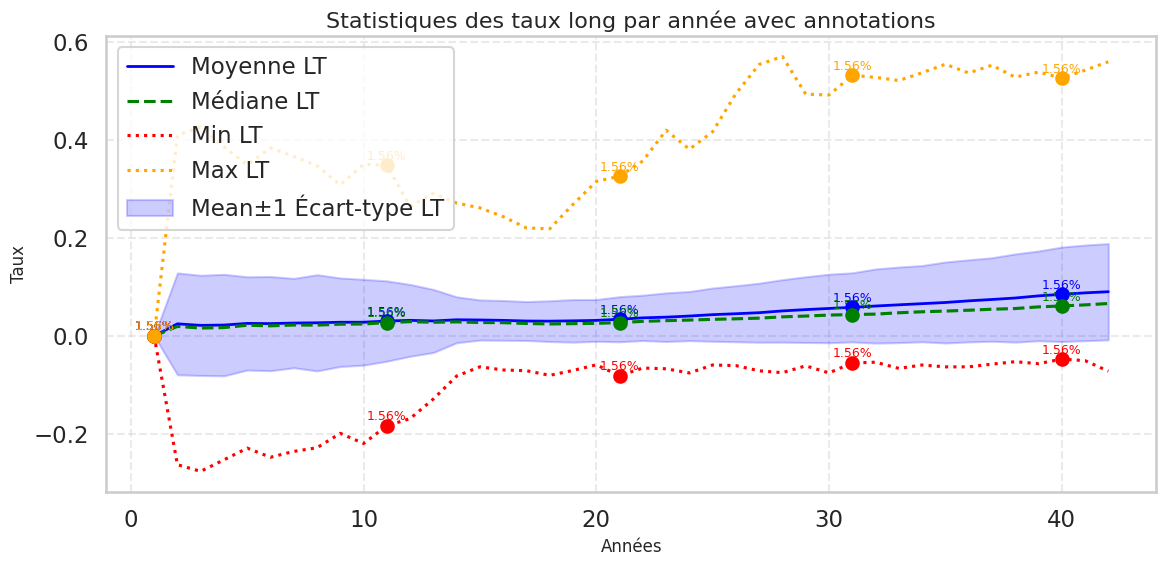

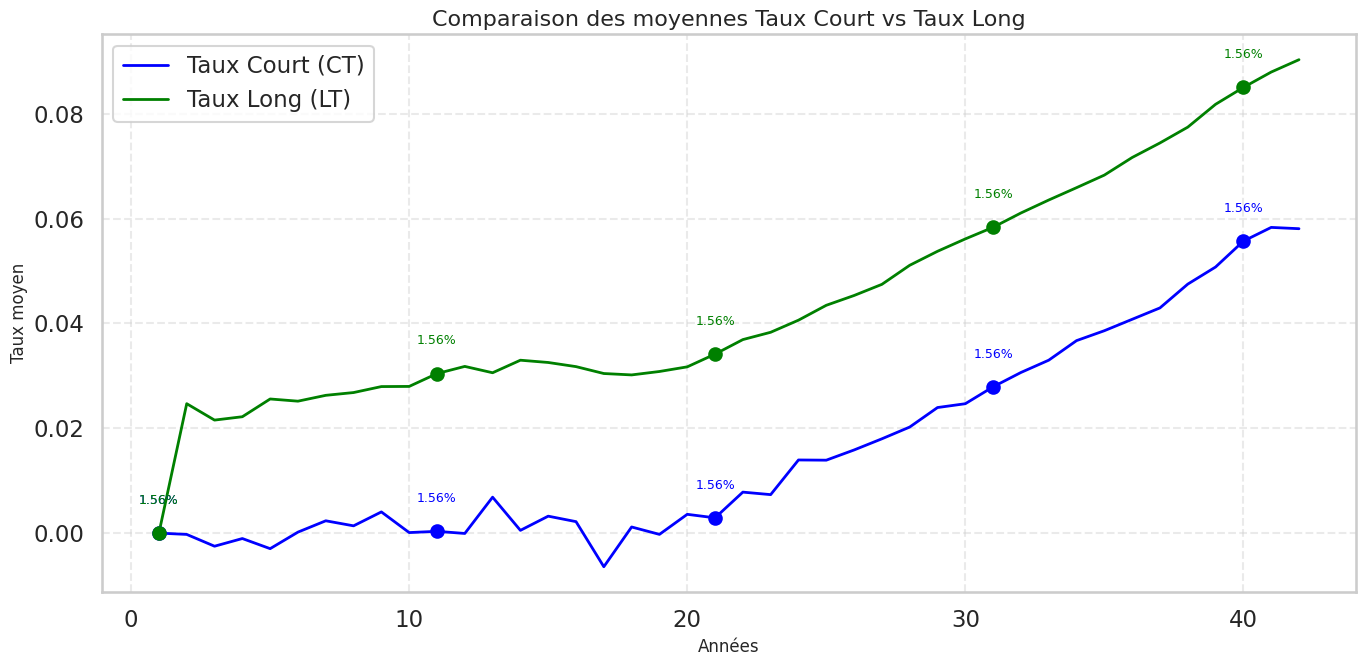

In [ ]:
#*******************************************************************
# 1.2.1 - Moyenne, médiane, écart-type par année
#*******************************************************************

# Tracer chaque scénario   ************************************ Tuax court ******* axis = 0, par ligne/par scénario **************************************************

# Calcul des statistiques
mean_by_yearCT = np.mean(TL_matrix, axis=0)
median_by_year = np.median(TL_matrix, axis=0)
std_by_year = np.std(TL_matrix, axis=0)
min_by_year = np.min(TL_matrix, axis=0)
max_by_year = np.max(TL_matrix, axis=0)

# Affichage des statistiques
#for i, year in enumerate(maturities):
#    print(f"Année {year:.0f} : Moyenne={mean_by_year[i]:.4f}, Médiane={median_by_year[i]:.4f}, Écart-type={std_by_year[i]:.4f}, Min={min_by_year[i]:.4f}, Max={max_by_year[i]:.4f}")

# Choisir les indices d'années à annoter
indices_to_annotate = [0, 10, 20, 30, 39]  # ajustable selon ton besoin

plt.figure(figsize=(12, 6))

# Tracer les courbes principales
plt.plot(maturities, mean_by_yearCT, label='Moyenne CT', color='blue', linewidth=2)
plt.plot(maturities, median_by_year, label='Médiane CT', color='green', linestyle='--')
plt.plot(maturities, min_by_year, label='Min CT', color='red', linestyle=':')
plt.plot(maturities, max_by_year, label='Max CT', color='orange', linestyle=':')

# Zone ±1 écart-type autour de la moyenne
plt.fill_between(maturities,
                 mean_by_yearCT - std_by_year,
                 mean_by_yearCT + std_by_year,
                 alpha=0.2, label='Mean±1 Écart-type CT', color='lightblue')

# Ajouter des points annotés
for idx in indices_to_annotate:
    x = maturities[idx]
    # Moyenne
    y_mean = mean_by_yearCT[idx]
    plt.scatter(x, y_mean, color='blue', zorder=5)
    plt.text(x, y_mean + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='blue')

    # Médiane
    y_median = median_by_year[idx]
    plt.scatter(x, y_median, color='green', zorder=5)
    plt.text(x, y_median + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='green')

    # Min
    y_min = min_by_year[idx]
    plt.scatter(x, y_min, color='red', zorder=5)
    plt.text(x, y_min + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='red')

    # Max
    y_max = max_by_year[idx]
    plt.scatter(x, y_max, color='orange', zorder=5)
    plt.text(x, y_max + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='orange')

# Personnalisation
plt.title("Statistiques des taux court par année avec annotations", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


# Tracer chaque scénario   ************************************ Taux long ******* axis = 0, par ligne/par scénario **************************************************

# Calcul des statistiques
mean_by_yearLT = np.mean(TLT_matrix, axis=0)
median_by_year = np.median(TLT_matrix, axis=0)
std_by_year = np.std(TLT_matrix, axis=0)
min_by_year = np.min(TLT_matrix, axis=0)
max_by_year = np.max(TLT_matrix, axis=0)

# Affichage des statistiques
# for i, year in enumerate(maturities):
#    print(f"Année {year:.0f} : Moyenne={mean_by_year[i]:.4f}, Médiane={median_by_year[i]:.4f}, Écart-type={std_by_year[i]:.4f}, Min={min_by_year[i]:.4f}, Max={max_by_year[i]:.4f}")

# Choisir les indices d'années à annoter
indices_to_annotate = [0, 10, 20, 30, 39]  # ajustable selon ton besoin

plt.figure(figsize=(12, 6))

# Tracer les courbes principales
plt.plot(maturities, mean_by_yearLT, label='Moyenne LT', color='blue', linewidth=2)
plt.plot(maturities, median_by_year, label='Médiane LT', color='green', linestyle='--')
plt.plot(maturities, min_by_year, label='Min LT', color='red', linestyle=':')
plt.plot(maturities, max_by_year, label='Max LT', color='orange', linestyle=':')

# Zone ±1 écart-type autour de la moyenne
plt.fill_between(maturities,
                 mean_by_yearLT - std_by_year,
                 mean_by_yearLT + std_by_year,
                 alpha=0.2, label='Mean±1 Écart-type LT', color='blue')

# Ajouter des points annotés
for idx in indices_to_annotate:
    x = maturities[idx]
    # Moyenne
    y_mean = mean_by_yearLT[idx]
    plt.scatter(x, y_mean, color='blue', zorder=5)
    plt.text(x, y_mean + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='blue')

    # Médiane
    y_median = median_by_year[idx]
    plt.scatter(x, y_median, color='green', zorder=5)
    plt.text(x, y_median + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='green')

    # Min
    y_min = min_by_year[idx]
    plt.scatter(x, y_min, color='red', zorder=5)
    plt.text(x, y_min + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='red')

    # Max
    y_max = max_by_year[idx]
    plt.scatter(x, y_max, color='orange', zorder=5)
    plt.text(x, y_max + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='orange')

# Personnalisation
plt.title("Statistiques des taux long par année avec annotations", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# ************************************ comparaison de deux CT & LT ****************************************************************************************************

import numpy as np
import matplotlib.pyplot as plt

# Calcul des moyennes si ce n'est pas déjà fait
mean_by_yearCT = np.mean(TL_matrix, axis=0)
mean_by_yearLT = np.mean(TLT_matrix, axis=0)

# Choisir les années à annoter (indices)
indices_to_annotate = [0, 10, 20, 30, 39]  # ajustable selon ton besoin

# Tracer les deux courbes
plt.figure(figsize=(14, 7))
plt.plot(maturities, mean_by_yearCT, label='Taux Court (CT)', color='blue', linewidth=2)
plt.plot(maturities, mean_by_yearLT, label='Taux Long (LT)', color='green', linewidth=2)

# Ajouter les points annotés
for idx in indices_to_annotate:
    x = maturities[idx]
    y_ct = mean_by_yearCT[idx]
    y_lt = mean_by_yearLT[idx]

    # Points
    plt.scatter(x, y_ct, color='blue', zorder=5)
    plt.scatter(x, y_lt, color='green', zorder=5)

    # Textes
    plt.text(x, y_ct + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='blue')
    plt.text(x, y_lt + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='green')

# Personnalisation
plt.title("Comparaison des moyennes Taux Court vs Taux Long", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux moyen", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

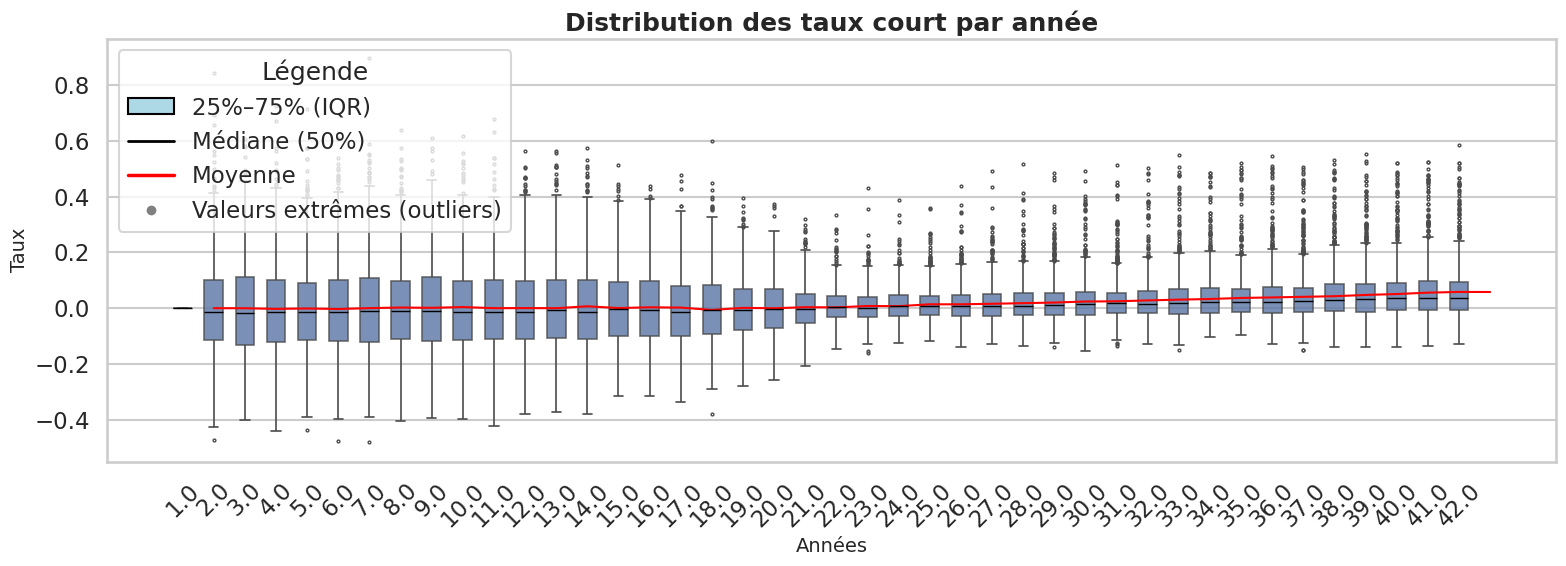

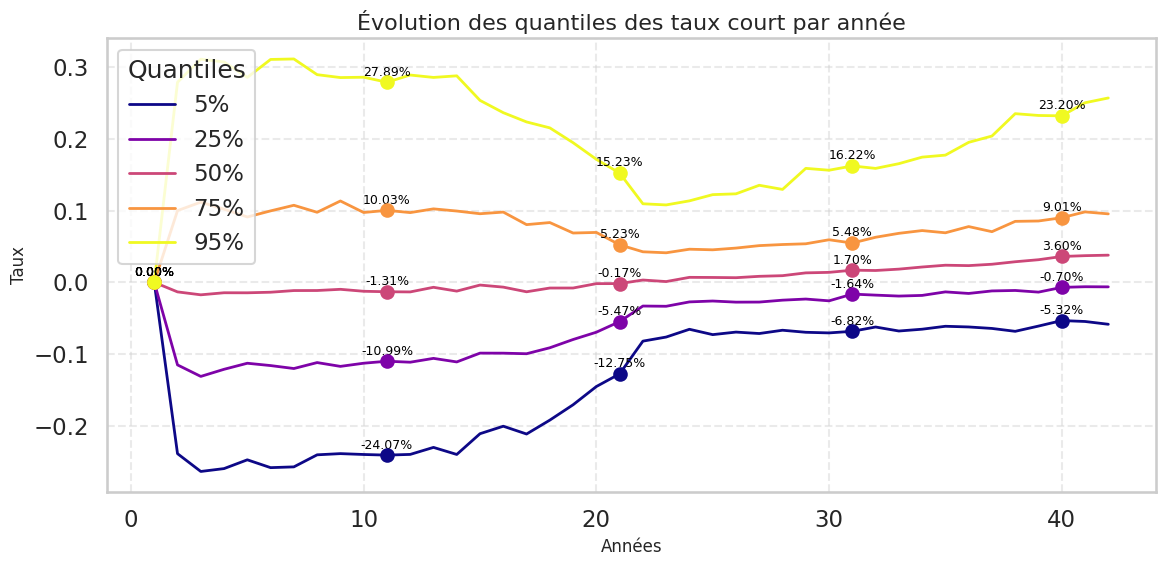

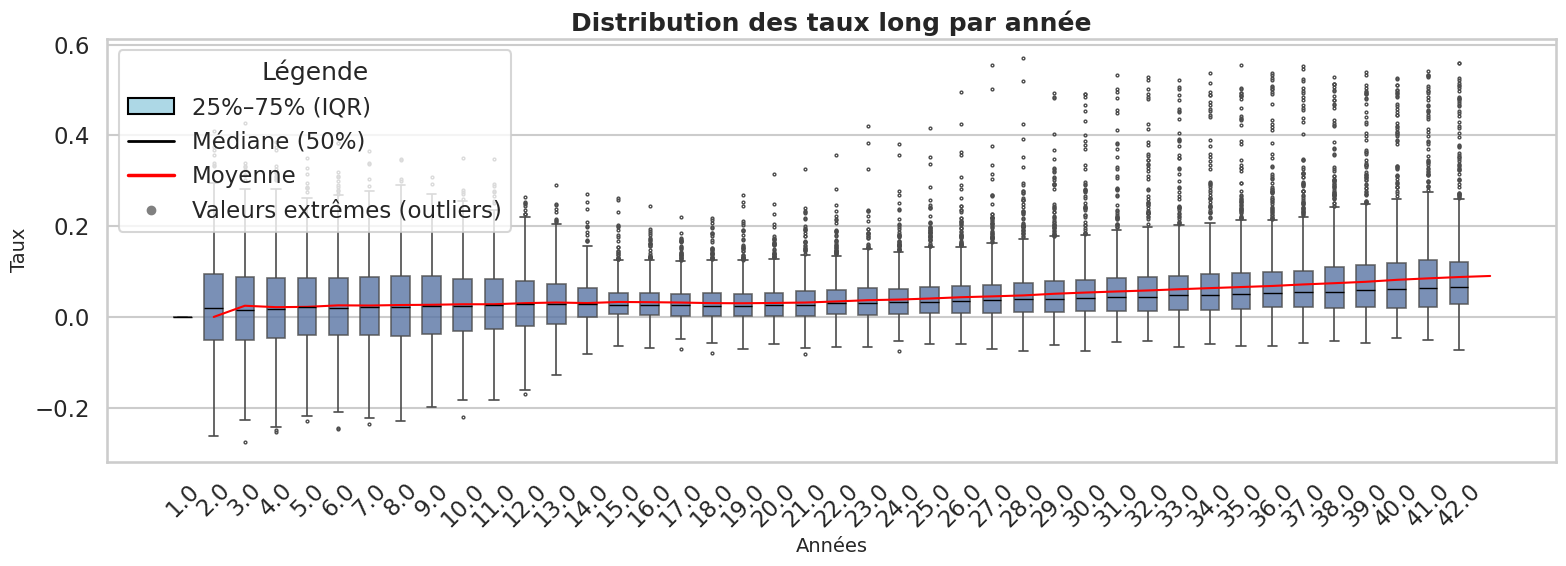

Quantiles par année :
      1.0       2.0       3.0       4.0       5.0       6.0       7.0   \
0.05   0.0 -0.130905 -0.137915 -0.138645 -0.124804 -0.125966 -0.117180   
0.25   0.0 -0.050236 -0.050811 -0.047371 -0.038996 -0.039866 -0.039134   
0.50   0.0  0.019410  0.016068  0.017077  0.021808  0.020597  0.022289   
0.75   0.0  0.094202  0.088202  0.085551  0.085962  0.084835  0.088316   
0.95   0.0  0.195681  0.197602  0.202224  0.192712  0.192627  0.183687   

          8.0       9.0       10.0  ...      33.0      34.0      35.0  \
0.05 -0.128671 -0.116233 -0.118866  ... -0.019323 -0.015052 -0.021489   
0.25 -0.042827 -0.036562 -0.031519  ...  0.015328  0.014785  0.017137   
0.50  0.022092  0.024001  0.024385  ...  0.047301  0.049320  0.050736   
0.75  0.090551  0.091134  0.084313  ...  0.090680  0.095190  0.097194   
0.95  0.197897  0.185422  0.189398  ...  0.192142  0.196069  0.212063   

          36.0      37.0      38.0      39.0      40.0      41.0      42.0  
0.05 -0.016864 -0

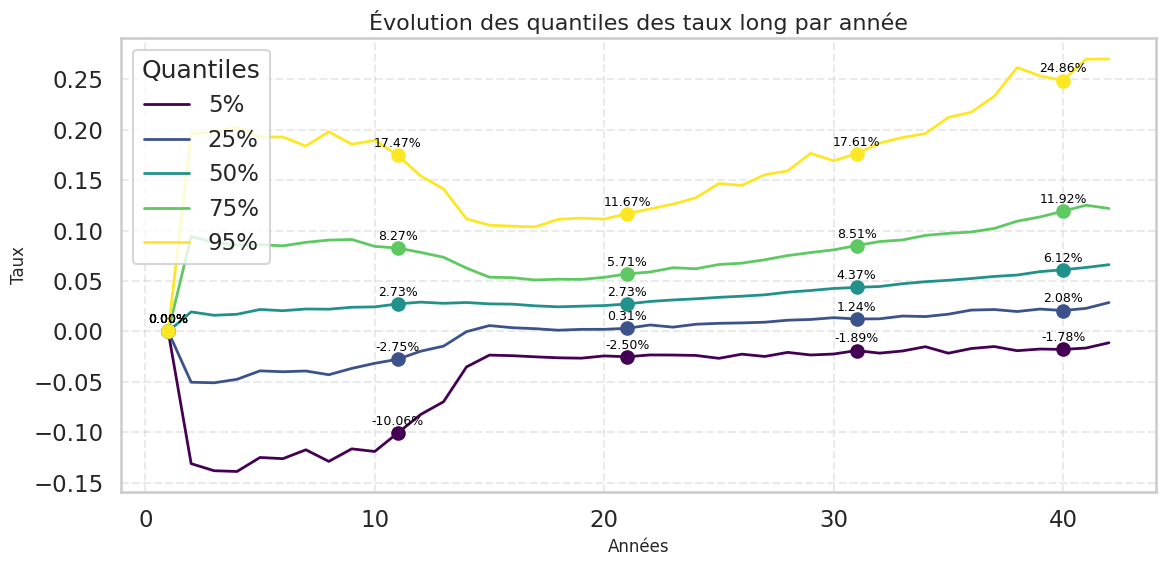

In [ ]:
#*******************************************************************
# 1.2.2 - Quantile sur 1000 scénarios par année
#*******************************************************************

# ****************************************************************** Taux court ******* axis = 0, par ligne/par scénario **************************************************
#  Boxplots pour visualiser la dispersion
# *******************************************************************

# Convertir TL_matrix en DataFrame
df_box = pd.DataFrame(TL_matrix, columns=maturities)

# Format long pour seaborn
df_long = df_box.melt(var_name='Année', value_name='Taux')

# Définir un style élégant
sns.set(style="whitegrid", context="talk", palette="deep")

# Créer le graphique
plt.figure(figsize=(16, 6))
ax = sns.boxplot(
    x='Année',
    y='Taux',
    data=df_long,
    width=0.6,
    linewidth=1.2,
    fliersize=2,
    boxprops=dict(alpha=0.8),
    medianprops=dict(color="black", linewidth=1)
)

# Ajouter une ligne de moyenne par année
mean_values = df_box.mean().values
sns.lineplot(x=maturities, y=mean_values, color='red', label='Moyenne', linewidth=1.5)

# Créer une légende personnalisée
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='25%–75% (IQR)'),
    Line2D([0], [0], color='black', linewidth=2, label='Médiane (50%)'),
    Line2D([0], [0], color='red', linewidth=2.5, label='Moyenne'),
    Line2D([0], [0], marker='o', color='gray', linestyle='None', markersize=6, label='Valeurs extrêmes (outliers)')
]

# Ajouter la légende
plt.legend(handles=legend_elements, title="Légende", loc='upper left')

# Personnalisation
plt.title("Distribution des taux court par année", fontsize=18, weight='bold')
plt.xlabel("Années", fontsize=14)
plt.ylabel("Taux", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#*******************************************************************
# 1.2.2 - Quantile sur 1000 scénarios par année
#*******************************************************************
# Définir les niveaux de quantiles
quantile_levels = [0.05, 0.25, 0.5, 0.75, 0.95]

# Créer un DataFrame pour stocker les quantiles
quantile_df = pd.DataFrame(index=quantile_levels, columns=maturities)

# Calculer les quantiles pour chaque année
for i, year in enumerate(maturities):
    quantile_df[year] = np.quantile(TL_matrix[:, i], quantile_levels)

# Afficher les quantiles
#print("Quantiles par année :")
#print(quantile_df)

# Choisir les indices d'années à annoter (ex : début, milieu, fin)
indices_to_annotate = [0, 10, 20, 30, 39]

# Tracer les courbes de quantiles
plt.figure(figsize=(12, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(quantile_levels)))

for i, q in enumerate(quantile_levels):
    y_values = quantile_df.loc[q]
    plt.plot(maturities, y_values, label=f"{int(q*100)}%", color=colors[i], linewidth=2)

    # Ajouter des points annotés
    for idx in indices_to_annotate:
        x = maturities[idx]
        y = y_values.iloc[idx]
        plt.scatter(x, y, color=colors[i], zorder=5)
        plt.text(x, y + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='black')

# Personnalisation
plt.title("Évolution des quantiles des taux court par année", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.legend(title="Quantiles")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ****************************************************************** Tuax long ******* axis = 0, par ligne/par scénario **************************************************
#  Boxplots pour visualiser la dispersion
# *******************************************************************

# Convertir TL_matrix en DataFrame
df_box = pd.DataFrame(TLT_matrix, columns=maturities)

# Format long pour seaborn
df_long = df_box.melt(var_name='Année', value_name='Taux')

# Définir un style élégant
sns.set(style="whitegrid", context="talk", palette="deep")

# Créer le graphique
plt.figure(figsize=(16, 6))
ax = sns.boxplot(
    x='Année',
    y='Taux',
    data=df_long,
    width=0.6,
    linewidth=1.2,
    fliersize=2,
    boxprops=dict(alpha=0.8),
    medianprops=dict(color="black", linewidth=1)
)

# Ajouter une ligne de moyenne par année
mean_values = df_box.mean().values
sns.lineplot(x=maturities, y=mean_values, color='red', label='Moyenne', linewidth=1.5)

# Créer une légende personnalisée
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='25%–75% (IQR)'),
    Line2D([0], [0], color='black', linewidth=2, label='Médiane (50%)'),
    Line2D([0], [0], color='red', linewidth=2.5, label='Moyenne'),
    Line2D([0], [0], marker='o', color='gray', linestyle='None', markersize=6, label='Valeurs extrêmes (outliers)')
]

# Ajouter la légende
plt.legend(handles=legend_elements, title="Légende", loc='upper left')

# Personnalisation
plt.title("Distribution des taux long par année", fontsize=18, weight='bold')
plt.xlabel("Années", fontsize=14)
plt.ylabel("Taux", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#*******************************************************************
# 1.2.2 - Quantile sur 1000 scénarios par année
#*******************************************************************
# Définir les niveaux de quantiles
quantile_levels = [0.05, 0.25, 0.5, 0.75, 0.95]

# Créer un DataFrame pour stocker les quantiles
quantile_df = pd.DataFrame(index=quantile_levels, columns=maturities)

# Calculer les quantiles pour chaque année
for i, year in enumerate(maturities):
    quantile_df[year] = np.quantile(TLT_matrix[:, i], quantile_levels)

# Afficher les quantiles
print("Quantiles par année :")
print(quantile_df)

# Choisir les indices d'années à annoter (ex : début, milieu, fin)
indices_to_annotate = [0, 10, 20, 30, 39]

# Tracer les courbes de quantiles
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(quantile_levels)))

for i, q in enumerate(quantile_levels):
    y_values = quantile_df.loc[q]
    plt.plot(maturities, y_values, label=f"{int(q*100)}%", color=colors[i], linewidth=2)

    # Ajouter des points annotés
    for idx in indices_to_annotate:
        x = maturities[idx]
        y = y_values.iloc[idx]
        plt.scatter(x, y, color=colors[i], zorder=5)
        plt.text(x, y + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='black')

# Personnalisation
plt.title("Évolution des quantiles des taux long par année", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.legend(title="Quantiles")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

1.3 Analyse par scénario / par ligne sur 40ans de projection

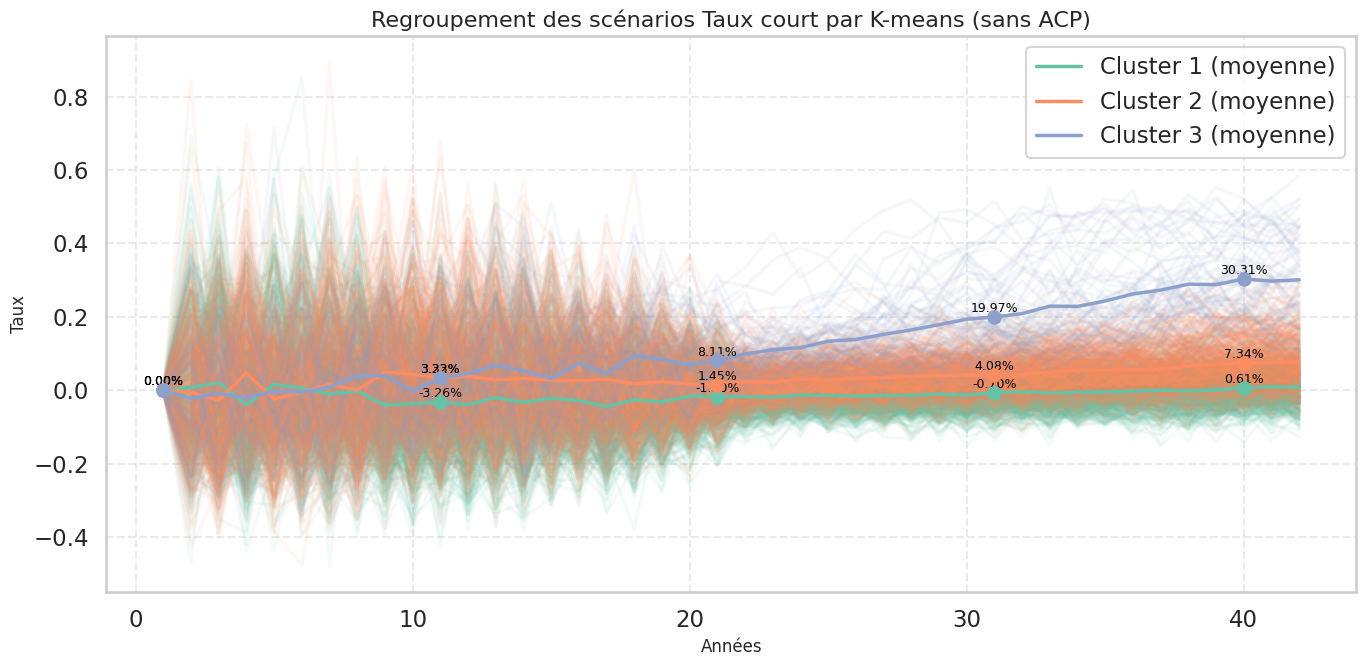

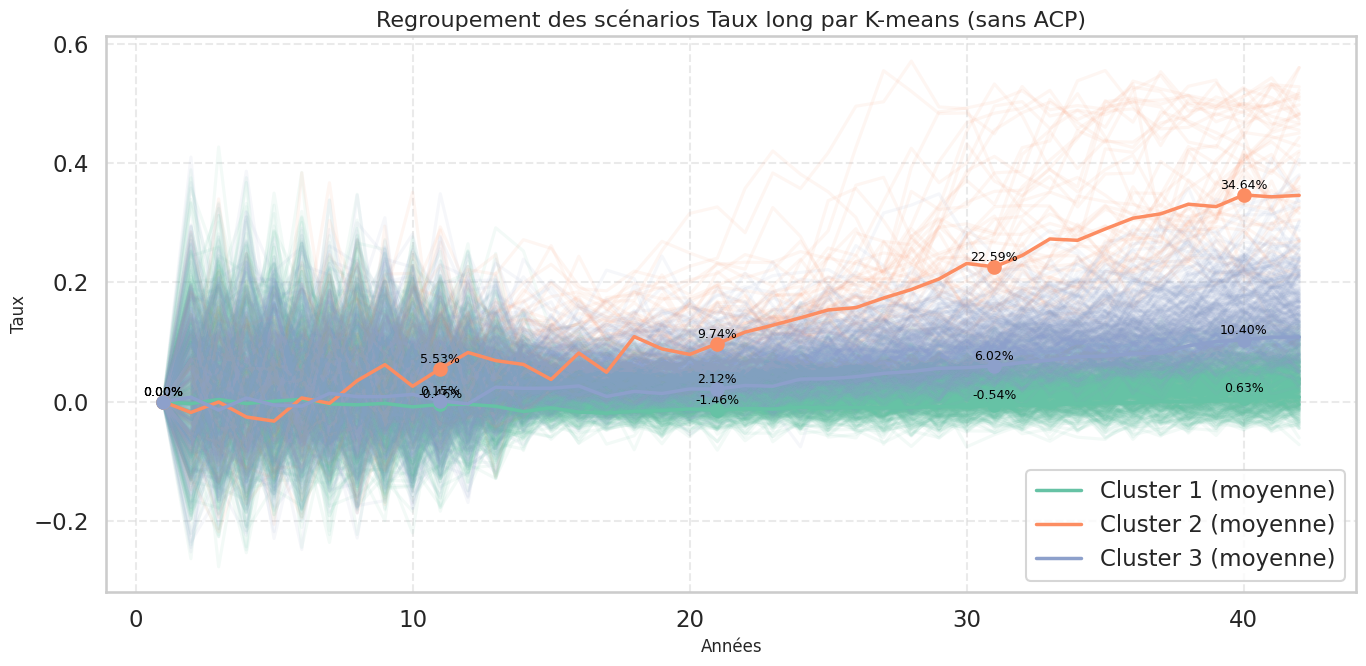

In [ ]:
# ****************************************************************** Tuax court ******* axis = 0, par ligne/par scénario **************************************************
# Étape 1 : Appliquer K-means sur les scénarios
k = 3  # nombre de groupes à ajuster selon ton besoin
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(TL_matrix)

# Étape 2 : Visualiser les scénarios regroupés
plt.figure(figsize=(14, 7))
palette = sns.color_palette("Set2", k)

for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    for i in cluster_indices:
        plt.plot(maturities, TL_matrix[i, :], color=palette[cluster], alpha=0.08)

# Ajouter les moyennes de chaque cluster
for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_mean = TL_matrix[cluster_indices].mean(axis=0)
    plt.plot(maturities, cluster_mean, color=palette[cluster], linewidth=2.5, label=f'Cluster {cluster+1} (moyenne)')

    # Choisir les années à annoter (ex : tous les 10 ans)
    indices_to_annotate = [0, 10, 20, 30, 39]  # ou toute autre sélection
    for idx in indices_to_annotate:
        x = maturities[idx]
        y = cluster_mean[idx]
        plt.scatter(x, y, color=palette[cluster], zorder=5)
        plt.text(x, y+0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='black')

# Personnalisation
plt.title("Regroupement des scénarios Taux court par K-means (sans ACP)", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


# ****************************************************************** Tuax long ******* axis = 0, par ligne/par scénario **************************************************
# Étape 1 : Appliquer K-means sur les scénarios
k = 3  # nombre de groupes à ajuster selon ton besoin
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(TLT_matrix)

# Étape 2 : Visualiser les scénarios regroupés
plt.figure(figsize=(14, 7))
palette = sns.color_palette("Set2", k)

for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    for i in cluster_indices:
        plt.plot(maturities, TLT_matrix[i, :], color=palette[cluster], alpha=0.08)

# Ajouter les moyennes de chaque cluster
for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_mean = TL_matrix[cluster_indices].mean(axis=0)
    plt.plot(maturities, cluster_mean, color=palette[cluster], linewidth=2.5, label=f'Cluster {cluster+1} (moyenne)')

    # Choisir les années à annoter (ex : tous les 10 ans)
    indices_to_annotate = [0, 10, 20, 30, 39]  # ou toute autre sélection
    for idx in indices_to_annotate:
        x = maturities[idx]
        y = cluster_mean[idx]
        plt.scatter(x, y, color=palette[cluster], zorder=5)
        plt.text(x, y+0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='black')

# Personnalisation
plt.title("Regroupement des scénarios Taux long par K-means (sans ACP)", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

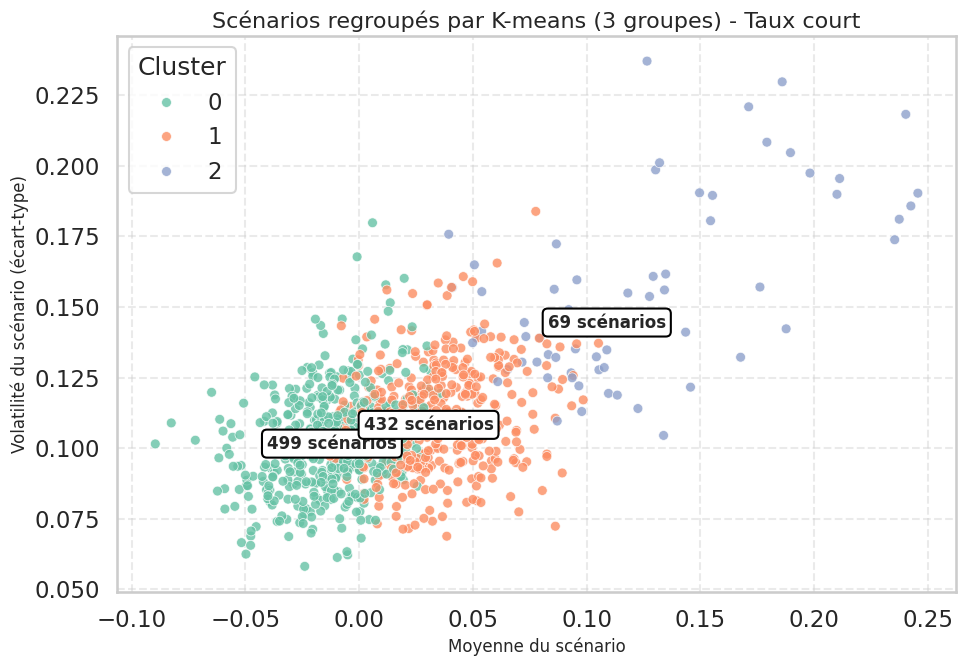

Cluster_0 contient 499 scénarios :
[0, 2, 5, 7, 9, 11, 12, 15, 16, 19, 21, 22, 24, 26, 29, 30, 32, 34, 37, 39]
...
Cluster_1 contient 432 scénarios :
[1, 3, 4, 8, 10, 13, 14, 17, 20, 23, 25, 33, 35, 36, 38, 40, 42, 44, 47, 49]
...
Cluster_2 contient 69 scénarios :
[6, 18, 27, 28, 31, 70, 76, 133, 191, 213, 218, 225, 247, 272, 297, 314, 317, 339, 342, 348]
...


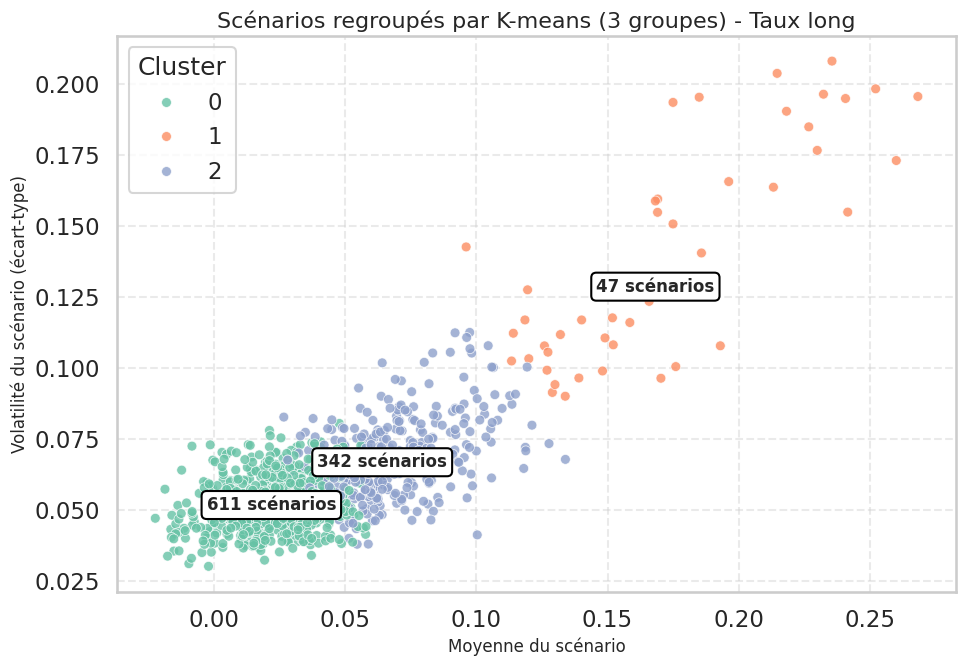

Cluster_0 contient 611 scénarios :
[0, 2, 4, 5, 7, 9, 11, 12, 14, 15, 16, 19, 20, 21, 22, 25, 26, 29, 30, 32]
...
Cluster_1 contient 47 scénarios :
[18, 27, 28, 70, 76, 133, 191, 213, 218, 272, 297, 314, 317, 339, 363, 368, 373, 385, 394, 450]
...
Cluster_2 contient 342 scénarios :
[1, 3, 6, 8, 10, 13, 17, 23, 24, 31, 33, 35, 36, 38, 40, 44, 47, 49, 54, 56]
...


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ****************************************************************** Tuax court ******* axis = 0, par ligne/par scénario **************************************************
# Étape 1 : Appliquer K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(TL_matrix)

# Étape 2 : Calculer les coordonnées des points
mean_by_scenario = TL_matrix.mean(axis=1)
std_by_scenario = TL_matrix.std(axis=1)

# Étape 3 : Visualiser les points colorés par cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("Set2", k)
sns.scatterplot(x=mean_by_scenario, y=std_by_scenario, hue=labels, palette=palette, s=50, alpha=0.8)

# Étape 4 : Ajouter le nombre de points par cluster
for cluster in range(k):
    indices = np.where(labels == cluster)[0]
    x_cluster = mean_by_scenario[indices]
    y_cluster = std_by_scenario[indices]
    count = len(indices)
    # Position du texte : médiane du nuage
    x_text = np.median(x_cluster)
    y_text = np.median(y_cluster)
    plt.text(x_text, y_text, f"{count} scénarios", fontsize=12, weight='bold', ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Personnalisation
plt.title("Scénarios regroupés par K-means (3 groupes) - Taux court", fontsize=16)
plt.xlabel("Moyenne du scénario", fontsize=12)
plt.ylabel("Volatilité du scénario (écart-type)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Créer un dictionnaire pour stocker les listes de scénarios par cluster
scenarios_by_cluster = {}

for cluster_id in range(k):
    # Indices des scénarios appartenant à ce cluster
    indices = np.where(labels == cluster_id)[0]
    scenarios_by_cluster[f"Cluster_{cluster_id}"] = indices.tolist()

# Exemple d'affichage
for name, scenario_list in scenarios_by_cluster.items():
    print(f"{name} contient {len(scenario_list)} scénarios :")
    print(scenario_list[:20])  # Affiche les 10 premiers scénarios du groupe
    print("...")

# ****************************************************************** Tuax long ******* axis = 0, par ligne/par scénario **************************************************
# Étape 1 : Appliquer K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(TLT_matrix)

# Étape 2 : Calculer les coordonnées des points
mean_by_scenario = TLT_matrix.mean(axis=1)
std_by_scenario = TLT_matrix.std(axis=1)

# Étape 3 : Visualiser les points colorés par cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("Set2", k)
sns.scatterplot(x=mean_by_scenario, y=std_by_scenario, hue=labels, palette=palette, s=50, alpha=0.8)

# Étape 4 : Ajouter le nombre de points par cluster
for cluster in range(k):
    indices = np.where(labels == cluster)[0]
    x_cluster = mean_by_scenario[indices]
    y_cluster = std_by_scenario[indices]
    count = len(indices)
    # Position du texte : médiane du nuage
    x_text = np.median(x_cluster)
    y_text = np.median(y_cluster)
    plt.text(x_text, y_text, f"{count} scénarios", fontsize=12, weight='bold', ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Personnalisation
plt.title("Scénarios regroupés par K-means (3 groupes) - Taux long", fontsize=16)
plt.xlabel("Moyenne du scénario", fontsize=12)
plt.ylabel("Volatilité du scénario (écart-type)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Créer un dictionnaire pour stocker les listes de scénarios par cluster
scenarios_by_cluster = {}

for cluster_id in range(k):
    # Indices des scénarios appartenant à ce cluster
    indices = np.where(labels == cluster_id)[0]
    scenarios_by_cluster[f"Cluster_{cluster_id}"] = indices.tolist()

# Exemple d'affichage
for name, scenario_list in scenarios_by_cluster.items():
    print(f"{name} contient {len(scenario_list)} scénarios :")
    print(scenario_list[:20])  # Affiche les 10 premiers scénarios du groupe
    print("...")

TL_matrix.shape[0] :  1000
Corrélation moyenne : 0.234
Corrélation min : -0.482
Corrélation max : 0.903


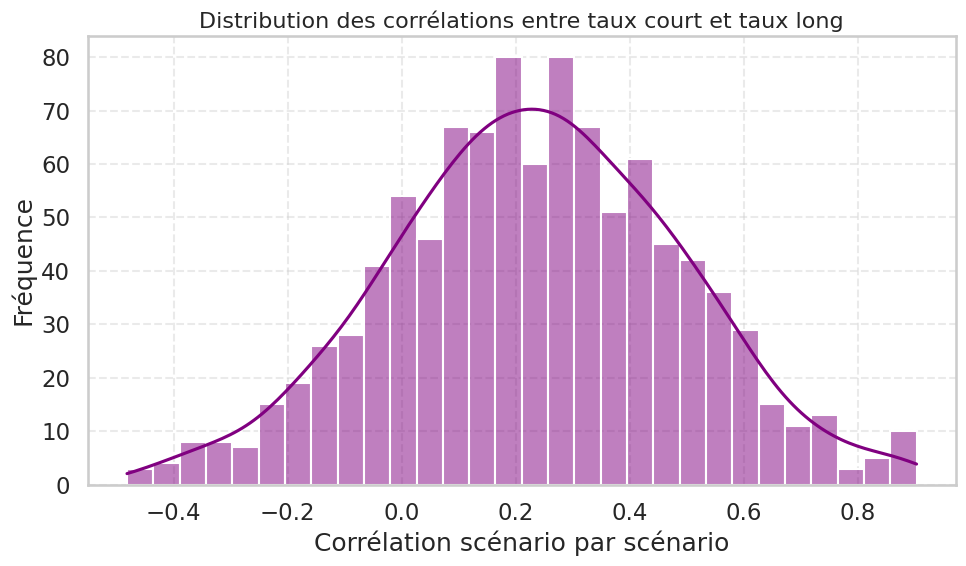

In [ ]:

# Vérification des dimensions
assert TL_matrix.shape == TLT_matrix.shape, "Les deux matrices doivent avoir la même forme"
print("TL_matrix.shape[0] : ", TL_matrix.shape[0])

# Étape 1 : Calcul de la corrélation scénario par scénario
correlations = []
for i in range(TL_matrix.shape[0]):
    corr = np.corrcoef(TL_matrix[i], TLT_matrix[i])[0, 1]
    correlations.append(corr)

correlations = np.array(correlations)

# Étape 2 : Statistiques descriptives
print(f"Corrélation moyenne : {np.mean(correlations):.3f}")
print(f"Corrélation min : {np.min(correlations):.3f}")
print(f"Corrélation max : {np.max(correlations):.3f}")

# Étape 3 : Visualisation de la distribution des corrélations
plt.figure(figsize=(10, 6))
sns.histplot(correlations, bins=30, kde=True, color='purple')
plt.title("Distribution des corrélations entre taux court et taux long", fontsize=16)
plt.xlabel("Corrélation scénario par scénario")
plt.ylabel("Fréquence")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

1.4 Quantiles Par année

# Nouvelle section - Action Yearly

Saving TIRAGES_INDACT_Y5.xlsx to TIRAGES_INDACT_Y5.xlsx


NameError: name 'pd' is not defined

Saving TIRAGES_INDIMMO_Y2.xlsx to TIRAGES_INDIMMO_Y2.xlsx
T_array (maturities) - indice immo: (42,)
Maturities (years) - indice immo: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TLT Matrix shape - indice immo: (1000, 42)
TLT Matrix (extrait) - indice immo:
 [[ 0.          0.01081637 -0.02375525  0.0227361  -0.05044113 -0.08195134
   0.03547421]
 [ 0.          0.02941115  0.06107239  0.01207158  0.09551896  0.13119973
   0.00905074]
 [ 0.          0.13004762  0.02333357  0.30919419 -0.11612673  0.08202127
  -0.02825399]
 [ 0.         -0.08050301  0.00958094 -0.20898844  0.18106572 -0.03916459
   0.07092715]
 [ 0.          0.1348437  -0.0524832  -0.00953165 -0.0125453  -0.0535372
   0.05696826]]


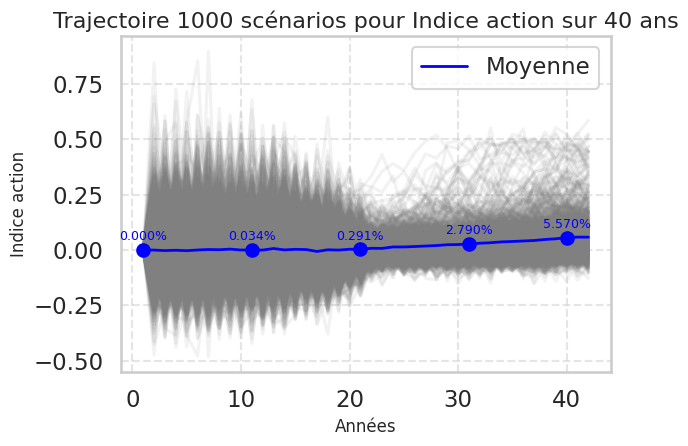

In [ ]:
# Tracer chaque scénario   *********************************************** Taux court axis = 0, par ligne/par scénario **************************************************
for i in range(TL_matrix.shape[0]):
    plt.plot(maturities, TL_matrix[i, :], color='gray', alpha=0.1)

# Ajouter la moyenne en surbrillance
mean_by_year = TL_matrix.mean(axis=0)
plt.plot(maturities, mean_by_year, color='blue', linewidth=2, label='Moyenne')
std_by_year = TL_matrix.std(axis=0)

# Choisir les indices d'années à annoter
indices_to_annotate = [0, 10, 20, 30, 39]  # ajustable selon ton besoin

# Ajouter les points annotés
for idx in indices_to_annotate:
    x = maturities[idx]
    y = mean_by_year[idx]
    plt.scatter(x, y, color='blue', zorder=5)
    plt.text(x, y + 0.03, f"{y*100:.3f}%", fontsize=9, ha='center', va='bottom', color='blue')

# Personnalisation
plt.title("Trajectoire 1000 scénarios pour Indice action sur 40 ans", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Indice action", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# Annexe
